# **${\Large\text{Criptografía 2024-10 - Proyecto 1}}$**

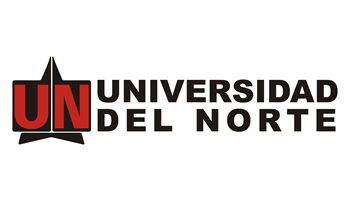

---

## **Nombre y Códigos de los Estudiantes:**
- Estudiante 1
- Estudiante 2
- Estudiante 3
- Estudiante 4

## **Indicaciones:**

1. **El proyecto debe ser entregado a más tardar a las 11:59 p.m. del domingo 31 de marzo del 2024**, después de esto el enlace para enviar el proyecto se cerrará. Asegúrese de enviar el proyecto antes de la hora de finalización, no se aceptarán proyectos enviados por ningún otro medio.
2. El proyecto debe ser realizado en equipos de **4 integrantes**.
3. Cree una copia de este archivo de Google Colab.
4. Utilice la librería `pycryptodome` para el desarrollo del proyecto.
  - Puede instalarla ejecutando el siguiente código en una celda del archivo de Google Colab: `!pip install pycryptodome`.
5. Únicamente envíe el cuaderno de Jupyter con los códigos, las respuestas y el informe correspondiente.

## **Enunciado:**
El objetivo de este proyecto es intentar recuperar la llave secreta de un cifrador de bloque, en específico AES-256, en 4 escenarios diferentes listados a continuación:
1. Llave con 16 bits modificados (6.25% del total de bits).
2. Llave con 32 bits modificados (12.5% del total de bits).
3. Llave con 64 bits modificados (25% del total de bits).
4. Llave con 128 bits modificados (50% del total de bits).

Para ello se ofrecen 10 pares de textos planos / textos cifrados $(m_i, c_i), 0 \le i < 10$, que se deben utilizar para verificar cada una de las posibles llaves. Los textos cifrados se generaron utilizando el modo de operación CBC (Cipher Block Chaining). Además, es importante mencionar que el relleno (padding) de los mensajes $m_i$ se realizó con la función `pad` de `Crypto.Util.Padding`.

Las llaves modificadas fueron obtenidas luego de un proceso de decadencia (decay) de las llaves originales, i.e., solo se modificaron bits 1 por bits 0. Adicionalmente, se provee una secuencia de números en la que cada dígito representa la cantidad de bits que decayeron en el byte correspondiente de la llave.

Una vez recuperada la llave original, se debe descifrar un texto cifrado adicional $c$ obtenido en modo CBC.

Finalmente, se debe realizar un informe (puede ser en el mismo Jupyter Notebook / Google Colab) dónde:
1. Se expliquen los métodos / estrategias utilizados para obtener las llaves originales y descifrar el texto cifrado adicional.
2. Se realice un análisis de los tiempos de ejecución de los métodos propuestos para la recuperación de las llaves.
3. Se realice un breve análisis de seguridad del criptosistema respecto a las llaves, contra un ataque en un esquema de decadencia (decay) como el realizado en este proyecto.
4. Se exponga y justifique los contratiempos y motivos en caso de no recuperar alguna de las llaves originales.

## **Caso 1 (16 bits modificados - 6.25%):**

In [1]:
key, dist = ('e6a910750b03e4c800c0c04d8544cf2cc470c5f8d668b2d7cd6387bc8ca84ad3', '10011011001000001110001010012011')
c = '6f25b6fd2f9c0d65c1f7f3f11b0fd0a8b8876e69fbba37e2f17ca72f60b711aa934db57c895ece4e6e965e5bfc86fcf56fc9785dcda9a604f0ecb5944adf832b0f4894aecc5c27dab42960f0ce98b811f20350d8ed72de6e679039eed6b2254f12a91daf57b54a4256054b36b4ecbf5f174b618472c4ef241836cc8b83d07c2a'

In [2]:
MSG_PAIRS_1 = [
    (b'The most important words a man can say are, "I will do better".', 'a1e796da5a4a864aabebb9a348b684686e2f5ca3938834856a9653f4791be390b2c8119375717f37297ce18c546727a8718937bfa0f9aec150eb10085775b50e7bc37846cc804fbfa1b9d307f97f7804'),
    (b'The purpose of a storyteller is not to tell you how to think, but to give you questions to think upon.', '8706f4fd4e7f1f20d5d1702fbcda669b8f6a9ce206e1d3ca8eb949a6a27b83d213f6a001e6aa9cdab83d19c2ff5143c5dbed6a17d1f94bef88231d56f070d96e15491d28ca33d05a484976d8b4940339f5d28ddbddec878ea02a129aa56faebadb020c485b1399367f2890e5e571a7e73e4d2716e4cd71e5a97442145418f612'),
    (b"It's easy to believe in something when you win all the time... The losses are what define a man's faith.", '45d9814d656d847737b8447cff70d6b0d2cfd623085d8150c81b9b3bdd384746ac0e267b858a2bd8362f8e4a24f2dc128225f2ae3da9f857e5e3f3c7ee571d2b20b66d714e4b3f5297aa41cb06f0927be78db2188283746f5cd377e9a54bbe0ec2868c7398ee41152942570ad29a7dcaf358ff45a30993b4e91d6037ca2fe4c0'),
    (b'Sometimes the prize is not worth the costs.', 'd09c3f0c3ccc5e49fd126f2fc4ce5068105a3beeb26dc66e6c332240b4e30917a5001204f58eba0beb2897fdc6ef19b608d0739eee3fa4b9867a39764a2227d0'),
    (b'Sometimes a hypocrite is nothing more than a man in the process of changing.', '889ed26f7615599bed86684af0d2606ab49f2a52efea712f3dff7c3ec37420d2b10ab1f42679363125fb81410e60e34f7c63c26a4c47b6232af542e36bbd3604e31b52db19f07e8cb19e518f32e7b7b415ee757a2bc9186cd91b52b7fb65a05c'),
    (b'Our belief is often strongest when it should be weakest. That is the nature of hope.', 'bf887c305b4771286a050720fe68def9057229245510d6401517262079d96a792d8746b295208e56b5ad12731c0c9ff6ef5c52022c887f40fa935790573040a5bdd19d73d7d92f63724232f870844b059f1f282061867d01fae85e2356a4554acf08d8bc61e798e219c6c52b025e997f'),
    (b"The most important step a man can take it's not the first one, it's the next one.", 'ba1ea23377644394f96e4c19bbf7c03a23b22dd3757c38148b0bc98064708fc88550b46f89f77cfdf265eb35af82b4b526264bc722e85760aca40b1707082da5b5e7903540a3432a130a7b2655c855a06bb0005f5d500d4e5664ae80acb03f4f7c5dae03b8a5ed0bc60c3227212156c9'),
    (b'Somebody has to start. Somebody has to step forward and do what is right, because it is right.', '879659d6efc8fdb116110068266da5068c6335d51152f041d47f1f03d6a35230c7eb10309bf739b3780b9a59ae367813f998e1e6d84db78a2d06517529234d2deeb09cc9ca82dcc1a5ffd1344c3e0ed9d95d7714444476ec7ed5f9237af517409df4fbf974fbc8e00cd140878cb79028'),
    (b"Accept the pain, but don't accept that you deserved it.", '7e3320f30329c8211ee6bf3fe6afb06c80e575c597fabf9926cabfa5b2a202d0cd294865326e1289b01343c1537aefe251974dfda261c245acc75daa90b0148fc90c4288cb89eca1f442630927921778'),
    (b"There's always another secret.", 'e6a5848b0de3b162f98e23e56972bff6de0a7305c41ce921ec56c19af4921ed367ecc25305544a5c722640dbfdf27105')
]

In [3]:
%pip install pycryptodome
from Crypto.Cipher import AES
from Crypto.Hash import HMAC, SHA256
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
from copy import deepcopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
def convertKeyIntoBits(keytmp):
    key1 = int(keytmp, 16)
    key1 = bin(key1)[2:]
    key1 = [int(key1[i:i+8], 2) for i in range(0, len(key1), 8)]
    key1 = [bin(key1[i])[2:] for i in range(0, len(key1))]
    key1 = [list(key1[i]) for i in range(0, len(key1))]
    for i in range(0, 32):
        while len(key1[i]) < 8:
            key1[i].insert(0, '0')
    return key1

In [5]:
keyBits = convertKeyIntoBits(key)

In [6]:
#convert dist into a vector
dist = [int(dist[i]) for i in range(0, len(dist))]


In [7]:
def getIndex1(thelist, value):
   if thelist != []:
      for item in thelist:
         for i in range(0, len(item)):
            if item[i] != value[i]:
               break
            if i == len(item) - 1:
               return 0
   return -1

In [8]:
def gen_possible_bytes(bytes, n):
    listBytes = []
    listBytes += bytes
    listFinalBytes = []
    if n == 0:
        return listBytes,n
    else:
        n= n - 1 
        for i in range (0, len(listBytes)):
            for j in range(0, 8):
                bytes1 = deepcopy(listBytes[i])  
                if(bytes1[j] == '0'):
                    bytes1[j] = '1'
                    if(getIndex1(listFinalBytes, bytes1) == -1):
                        listFinalBytes.append(bytes1)               
        listTot = gen_possible_bytes(listFinalBytes, n)[0]
        return listTot,n

In [9]:
def gen_every_key(keyBitsTmp, distTmp):
    keyList = [[i] for i in range(32)]
    for i in range(0, len(distTmp)):
        if distTmp[i] != 0:
            keyTmp = []
            keyTmp.append(keyBitsTmp[i])
            keyList[i] += gen_possible_bytes(keyTmp, distTmp[i])[0]
        else:
            keyList[i].append(keyBitsTmp[i])   
    for item in keyList:
        del item[0]
    return keyList

In [10]:
keyList1 = gen_every_key(keyBits, dist)


In [11]:
def convert_char_str(list):
    for item in list:
        for i in range(0, len(item)):
            str = ""
            for j in range(0, len(item[i])):
                str += item[i][j]
            item[i] = str
    return list
    

In [12]:
listPossibleBytes = convert_char_str(keyList1)

In [13]:
def bits_to_hex(bits):
    # Padding the bits with zeros to make the length a multiple of 4
    while len(bits) % 4 != 0:
        bits = '0' + bits

    # Dictionary mapping binary strings to hexadecimal digits
    binary_to_hex = {
        '0000': '0',
        '0001': '1',
        '0010': '2',
        '0011': '3',
        '0100': '4',
        '0101': '5',
        '0110': '6',
        '0111': '7',
        '1000': '8',
        '1001': '9',
        '1010': 'a',
        '1011': 'b',
        '1100': 'c',
        '1101': 'd',
        '1110': 'e',
        '1111': 'f'
    }

    hex_string = ''
    # Grouping the bits into groups of four and converting each group to hexadecimal
    for i in range(0, len(bits), 4):
        hex_string += binary_to_hex[bits[i:i+4]]

    return hex_string

In [14]:
def decrypt_message(key, ciphertext):
    #key = bits_to_hex(key)
    #key = bytes.fromhex(key)
    ciphertext = bytes.fromhex(ciphertext)
    # Extract the IV from the beginning of the ciphertext
    iv = ciphertext[:AES.block_size]
    
    # Create AES cipher object in CBC mode
    cipher = AES.new(key, AES.MODE_CBC, iv)
    
    # Decrypt the ciphertext
    
    decrypted_data = cipher.decrypt(ciphertext[AES.block_size:])
    
    # Unpad the decrypted data
    #unpadded_data = unpad(decrypted_data, AES.block_size)
    
    # Return the unpadded data
    return decrypted_data

In [15]:

def generate_combinations(list_of_lists, index=0, current_combination=""):
    padMsg9 = pad(MSG_PAIRS_1[9][0], AES.block_size)
    if index == len(list_of_lists):
        msg = decrypt_message(current_combination, MSG_PAIRS_1[9][1])
        if msg == padMsg9:
            print(current_combination)
        return

    for chunk in list_of_lists[index]:
        new_combination = current_combination + chunk
        generate_combinations(list_of_lists, index + 1, new_combination)
        

In [16]:
def generate_one_key(listKey):
    key = []
    str = ""
    for i in range(0, len(listKey)):
        key.append(listKey[i][0])
        str += listKey[i][0]
    return key,str

In [17]:
from Crypto.Util.Padding import unpad
key = generate_one_key(listPossibleBytes)[1]
print(key)
key = bits_to_hex(key)
print(key)
key = bytes.fromhex(key)
ciphertext = bytes.fromhex(c)
cipher = AES.new(key, AES.MODE_CBC, ciphertext[:AES.block_size])
decrypted_data = cipher.decrypt(ciphertext[AES.block_size:])
print(decrypted_data)


1111011010101001000100001111010110001011000000111111010011101000000000001100000011100000010011011000010101000100110011110010110011100100111100001110010111111000110101100110100011110010110101111110110101100011100001111111110011101100101010001100101011110011
f6a910f58b03f4e800c0e04d8544cf2ce4f0e5f8d668f2d7ed6387fceca8caf3
b'\x92\x82\xd3RD\xef\xff\xb1\xd8k\xb7\xb6\xb0\x801\x1b\xdb6A2DC\x92\x87\xbd\xb0\x9f&\xd5\x16$\x8e\xf1\xd5cE\x1e\x16\xf4\x8a\xa9v\xa0\xa2\xed@\xfd\x81\xad\x9c\xd7\x19J\xd6\xbf\xb4\x82\x9e\xa0\xa5Z0\x9beBL\xfc\xe5\xa4\xbfN\x0f\xfc\xb0\xda\xbe\x9bR\xcc\x95r\xb6\xb9\xfe\x14\xfd\xbe\xdf\xd2\x16\x8c\xb2-\xe2/m\xe7(?B\x93ql_pQDY\xcc4#('


In [18]:
#generate_combinations(test)

In [19]:
def divide_list_of_lists(list_of_lists, num_parts):
    chunk_size = len(list_of_lists) // num_parts
    divided_lists = [list_of_lists[i * chunk_size:(i + 1) * chunk_size] for i in range(num_parts)]
    # If there's any remaining elements, distribute them evenly
    remainder = len(list_of_lists) % num_parts
    if remainder:
        print("fail")
        for i in range(remainder):
            divided_lists[i].append(list_of_lists[num_parts * chunk_size + i])
    return divided_lists


In [20]:
listPossibleBytesDivided = divide_list_of_lists(listPossibleBytes, 4)

In [21]:
listPossibleBytesDivided

[[['11110110', '11101110', '11100111'],
  ['10101001'],
  ['00010000'],
  ['11110101', '01111101', '01110111'],
  ['10001011', '01001011', '00101011', '00011011', '00001111'],
  ['00000011'],
  ['11110100', '11101100', '11100110', '11100101'],
  ['11101000', '11011000', '11001100', '11001010', '11001001']],
 [['00000000'],
  ['11000000'],
  ['11100000', '11010000', '11001000', '11000100', '11000010', '11000001'],
  ['01001101'],
  ['10000101'],
  ['01000100'],
  ['11001111'],
  ['00101100']],
 [['11100100', '11010100', '11001100', '11000110', '11000101'],
  ['11110000', '01111000', '01110100', '01110010', '01110001'],
  ['11100101', '11010101', '11001101', '11000111'],
  ['11111000'],
  ['11010110'],
  ['01101000'],
  ['11110010', '10111010', '10110110', '10110011'],
  ['11010111']],
 [['11101101', '11011101', '11001111'],
  ['01100011'],
  ['10000111'],
  ['11111100', '10111110', '10111101'],
  ['11101100',
   '11011100',
   '11001110',
   '11001101',
   '10111100',
   '10101110',
   

In [22]:
import Decrypting
listTmp = []


test00 = Decrypting.gen_combo_without_threding_test(listPossibleBytesDivided[0])
test01 = Decrypting.gen_combo_without_threding_test(listPossibleBytesDivided[1])
test02 = Decrypting.gen_combo_without_threding_test(listPossibleBytesDivided[2])
test03 = Decrypting.gen_combo_without_threding_test(listPossibleBytesDivided[3])

In [23]:
test = []
test.append(test00)
test.append(test01)
test.append(test02)
test.append(test03)
test

[['1111011010101001000100001111010110001011000000111111010011101000',
  '1111011010101001000100001111010110001011000000111111010011011000',
  '1111011010101001000100001111010110001011000000111111010011001100',
  '1111011010101001000100001111010110001011000000111111010011001010',
  '1111011010101001000100001111010110001011000000111111010011001001',
  '1111011010101001000100001111010110001011000000111110110011101000',
  '1111011010101001000100001111010110001011000000111110110011011000',
  '1111011010101001000100001111010110001011000000111110110011001100',
  '1111011010101001000100001111010110001011000000111110110011001010',
  '1111011010101001000100001111010110001011000000111110110011001001',
  '1111011010101001000100001111010110001011000000111110011011101000',
  '1111011010101001000100001111010110001011000000111110011011011000',
  '1111011010101001000100001111010110001011000000111110011011001100',
  '1111011010101001000100001111010110001011000000111110011011001010',
  '11110110101010010

In [24]:
import cProfile
import processing
from processing import generate_combinations_parallel

padMsg9 = pad(MSG_PAIRS_1[9][0], AES.block_size)
#funzionante
#tmp = processing.generate_combinations1(test, padMsg9, MSG_PAIRS_1[9][1])


In [25]:
key = '1110011110101001000100000111011100011011000000111110011011001010000000001100000011000100010011011000010101000100110011110010110011010100011100011100110111111000110101100110100010111010110101111100111101100011100001111111110011001101101010001100101011011011'
key = b'\xe7\xa9\x10w\x1b\x03\xe6\xca\x00\xc0\xc4M\x85D\xcf,\xd4q\xcd\xf8\xd6h\xba\xd7\xcfc\x87\xfc\xcd\xa8\xca\xdb'
msg = decrypt_message(key, MSG_PAIRS_1[9][1])

In [26]:
msg = unpad(msg, AES.block_size)

In [27]:
msg

b"There's always another secret."

In [28]:
msgs = []
for i in range(6):
    msg = decrypt_message(key, MSG_PAIRS_1[i][1])
    msg = unpad(msg, AES.block_size)
    msgs.append(msg)


In [29]:
msgs

[b'The most important words a man can say are, "I will do better".',
 b'The purpose of a storyteller is not to tell you how to think, but to give you questions to think upon.',
 b"It's easy to believe in something when you win all the time... The losses are what define a man's faith.",
 b'Sometimes the prize is not worth the costs.',
 b'Sometimes a hypocrite is nothing more than a man in the process of changing.',
 b'Our belief is often strongest when it should be weakest. That is the nature of hope.']

In [30]:
msgFinale = decrypt_message(key, c)
msgFinale = unpad(msgFinale, AES.block_size)

In [31]:
msgFinale

b"If you give up what you want most for what you think you should want more, you'll end up miserable."

## **Caso 2 (32 bits modificados - 12.5%):**

In [32]:
key, dist = ('998405615014812088ea9a8259209a264528d971501b029ef406580081241000', '01001121100103021100121011122231')
c = 'f44c5109eb7edf7619bc6c0ddd29e6386c293c5e0e65bcf1cdb7b22fe24445df2cef9c9d8300c7000ad7fe67b253926ffab0c54d681b20237b889c1292f673b85f5aadfd587881c9bf677d5411436a82'

In [33]:
MSG_PAIRS_2 = [
    (b'The most important words a man can say are, "I will do better".', 'ec062d81919ed6709ef5bddf28de4144690491ac460800400cdfaae5c90f099d04ae5d6792fbb0d5d2e10387936cb5eb4f941226823a8d089c6b66cc8bb3d97c316890ec06843b021dc60c02bd9ec04f'),
    (b'The purpose of a storyteller is not to tell you how to think, but to give you questions to think upon.', '9feb273685acd1a2d67e23ad8142f653a44f750059239b1149cd5d4b4ab4e5c577f134cecd988a4922b2c02b9dbe88905c51324745a134db9841bfb2ba7cdb2979a68ad5cf16d42e68ef5a5b13eae6b6b0aa792424b6f082fa80f030b7a4c4941b659902a245d5a01993a6ea9c83a95926fdeb1cc56d5d3ff9163173a6cea928'),
    (b"It's easy to believe in something when you win all the time... The losses are what define a man's faith.", '2d7027a19d30960a8bd2b12d5ae195b61b449fb02d246974c81ca44ea050b7813c92cb82a68e489bb622e46a14a72c1159b466f237882204f75ab56169c3ef0390a12e5ffdc3d355697075145375f5d1b546b130739a5552922475c45eea7e2894ea47372b46fdc5c1fb2c7b025013b01ce0556e673f43d50d497d0ed6107482'),
    (b'Sometimes the prize is not worth the costs.', 'a3f5ace24555fe6ff0fa0e33517eba7bee70cf242d6579b28e63fd8c8e12866e80f8328c94c5713ff5cefd3bb7369d1ef06933e4304d558fa52c58951b65a982'),
    (b'Sometimes a hypocrite is nothing more than a man in the process of changing.', 'f39bc8635cc38aa729e2fe806805322e6118676c65c26234d39060dd43f18208739c6d14d8bb410083f984646bcc4d61553a5629689c1f46f3ed3cf838c31505fecc916a3b46a484b960aeb6e350d521486044dfd23a32efedd46a5206b05a6b'),
    (b'Our belief is often strongest when it should be weakest. That is the nature of hope.', '9075304ed551500510015811c5db6bacb2cf4c8f384f0053787f28a3c5e0948726a88aedc0a07b1da236e4ec1b59a2eb10f1073d4fc4bc72d0c4a496c98137cddbc32ea538bdf1d380323c98b78ac1f53752003e22212bb168dcad05610b6d1ed69a8c6f35742abd0e1d693a90d3b0ac'),
    (b"The most important step a man can take it's not the first one, it's the next one.", '4a612cd2c8fdef456206ffce68d39cb49d0d57b424b1f730f38507c7ddd8bea393870bc1da998a8098e3ac0aec78bf05b6a19ccaf2caeeb71546d670c6f24da7f8889ef556e7c339bf7ab78389f8dd10c3ac8992effef6be4fcff2d3836fe8c2eee7eba701ecc5bfff906079dd8f05a2'),
    (b'Somebody has to start. Somebody has to step forward and do what is right, because it is right.', 'd450af52af612b930e1dc25a2f225fb11e820191a8501769fdb99b363b3b7aca01f5980dec8ff569224848e304f0d4e109b7f26ea581a6bee58c1893939c1537c226939cf87005b6b72af6cfca0392e75d6f4891e28dde2bf714cbe2e197e768b85d3330dfa6e165c2dc97f94236ae40'),
    (b"Accept the pain, but don't accept that you deserved it.", '98d3092b52af22f68cd22cb72db63aa747f5f94707be6bfb1be033548aa8a8201dd2d9606eb20ff0dfc74cffde83da1b238bef6eaf2d0094ac8c942bf4bcb25eb15670c25aca8d6c0dbee88a62a2c6a0'),
    (b"There's always another secret.", '5363285b8ad921567d98818cba24b0f664b7447735a30770a6845f966e80a38cef05a2af91d10768ffc3c62d2de78b82')
]

In [34]:
keyBytes = convertKeyIntoBits(key)
dist = [int(dist[i]) for i in range(0, len(dist))]

In [35]:
keyCombinations = gen_every_key(keyBytes, dist)

In [36]:
keyCombinations

[[['1', '0', '0', '1', '1', '0', '0', '1']],
 [['1', '1', '0', '0', '0', '1', '0', '0'],
  ['1', '0', '1', '0', '0', '1', '0', '0'],
  ['1', '0', '0', '1', '0', '1', '0', '0'],
  ['1', '0', '0', '0', '1', '1', '0', '0'],
  ['1', '0', '0', '0', '0', '1', '1', '0'],
  ['1', '0', '0', '0', '0', '1', '0', '1']],
 [['0', '0', '0', '0', '0', '1', '0', '1']],
 [['0', '1', '1', '0', '0', '0', '0', '1']],
 [['1', '1', '0', '1', '0', '0', '0', '0'],
  ['0', '1', '1', '1', '0', '0', '0', '0'],
  ['0', '1', '0', '1', '1', '0', '0', '0'],
  ['0', '1', '0', '1', '0', '1', '0', '0'],
  ['0', '1', '0', '1', '0', '0', '1', '0'],
  ['0', '1', '0', '1', '0', '0', '0', '1']],
 [['1', '0', '0', '1', '0', '1', '0', '0'],
  ['0', '1', '0', '1', '0', '1', '0', '0'],
  ['0', '0', '1', '1', '0', '1', '0', '0'],
  ['0', '0', '0', '1', '1', '1', '0', '0'],
  ['0', '0', '0', '1', '0', '1', '1', '0'],
  ['0', '0', '0', '1', '0', '1', '0', '1']],
 [['1', '1', '1', '0', '0', '0', '0', '1'],
  ['1', '1', '0', '1', '0'

In [37]:
keyCombinations = convert_char_str(keyCombinations)
keyCombinations

[['10011001'],
 ['11000100', '10100100', '10010100', '10001100', '10000110', '10000101'],
 ['00000101'],
 ['01100001'],
 ['11010000', '01110000', '01011000', '01010100', '01010010', '01010001'],
 ['10010100', '01010100', '00110100', '00011100', '00010110', '00010101'],
 ['11100001',
  '11010001',
  '11001001',
  '11000101',
  '11000011',
  '10110001',
  '10101001',
  '10100101',
  '10100011',
  '10011001',
  '10010101',
  '10010011',
  '10001101',
  '10001011',
  '10000111'],
 ['10100000',
  '01100000',
  '00110000',
  '00101000',
  '00100100',
  '00100010',
  '00100001'],
 ['11001000', '10101000', '10011000', '10001100', '10001010', '10001001'],
 ['11101010'],
 ['10011010'],
 ['11000010', '10100010', '10010010', '10001010', '10000110', '10000011'],
 ['01011001'],
 ['11110000',
  '11101000',
  '11100100',
  '11100010',
  '11100001',
  '10111000',
  '10110100',
  '10110010',
  '10110001',
  '10101100',
  '10101010',
  '10101001',
  '10100110',
  '10100101',
  '10100011',
  '01111000',
 

In [38]:
import processing

In [42]:
num_parts = 4
keyCombinationsDivided = divide_list_of_lists(keyCombinations, num_parts)
for i, sublist in enumerate(keyCombinationsDivided):
    print(f"List of lists {i}: {sublist}")

List of lists 0: [['10011001'], ['11000100', '10100100', '10010100', '10001100', '10000110', '10000101'], ['00000101'], ['01100001'], ['11010000', '01110000', '01011000', '01010100', '01010010', '01010001'], ['10010100', '01010100', '00110100', '00011100', '00010110', '00010101'], ['11100001', '11010001', '11001001', '11000101', '11000011', '10110001', '10101001', '10100101', '10100011', '10011001', '10010101', '10010011', '10001101', '10001011', '10000111'], ['10100000', '01100000', '00110000', '00101000', '00100100', '00100010', '00100001']]
List of lists 1: [['11001000', '10101000', '10011000', '10001100', '10001010', '10001001'], ['11101010'], ['10011010'], ['11000010', '10100010', '10010010', '10001010', '10000110', '10000011'], ['01011001'], ['11110000', '11101000', '11100100', '11100010', '11100001', '10111000', '10110100', '10110010', '10110001', '10101100', '10101010', '10101001', '10100110', '10100101', '10100011', '01111000', '01110100', '01110010', '01110001', '01101100', '

In [44]:
import processing3
test = []
for i in range(0,len(keyCombinationsDivided)):
    test.append(Decrypting.gen_combo_without_threding_test(keyCombinationsDivided[i]))
    print(i)

0
1
2


In [41]:
test

[['10011001110001000000010101100001',
  '10011001101001000000010101100001',
  '10011001100101000000010101100001',
  '10011001100011000000010101100001',
  '10011001100001100000010101100001',
  '10011001100001010000010101100001'],
 ['11010000100101001110000110100000',
  '11010000100101001110000101100000',
  '11010000100101001110000100110000',
  '11010000100101001110000100101000',
  '11010000100101001110000100100100',
  '11010000100101001110000100100010',
  '11010000100101001110000100100001',
  '01110000100101001110000110100000',
  '11010000100101001101000110100000',
  '11010000100101001101000101100000',
  '01110000100101001110000101100000',
  '11010000100101001101000100110000',
  '01110000100101001110000100110000',
  '11010000100101001101000100101000',
  '01110000100101001110000100101000',
  '11010000100101001101000100100100',
  '01110000100101001110000100100100',
  '11010000100101001101000100100010',
  '11010000100101001101000100100001',
  '01110000100101001110000100100010',
  '01110000

In [ ]:
import processing4

padMsg9 = pad(MSG_PAIRS_2[9][0], AES.block_size)
combinations = processing4.generate_combinations(test, padMsg9, MSG_PAIRS_2[9][1])
#print(combinations)

futurjes:  6
num_workers:  0
num_workers:  1
num_workers:  2
num_workers:  3
num_workers:  4
num_workers:  5


KeyboardInterrupt: 

## **Caso 3 (64 bits modificados - 25%):**

In [ ]:
key, dist = ('828000c00050093cac15d4081a214240ea440800042084c02a91810400030010', '22413222211121120124413200415332')
c = '48a099e38e927482da3933f73779336021e9f7756a793126c72159d043a74850a706f62d35bd67ef742c6dd8c3196b42d9e44af575b18ad1f86bacd167380f88942bd813e5939533d95c136d800c3274c54d131706be4e82c2f8ff775ac84e06dfc72e8d3cf968a8d42c516e455f511e'

In [ ]:
MSG_PAIRS_3 = [
    (b'The most important words a man can say are, "I will do better".', 'a50aa86c29bd7ad70c9ca103a5fc39ee6fc71108b0351f7afb93b291a52ab2cdd028ad6572e7cb67bef71eb203e3f649124ca2a8e3d8da4322adb3ba86a31075d5c3aa5c0b1930924daea25d76221cf2'),
    (b'The purpose of a storyteller is not to tell you how to think, but to give you questions to think upon.', '79c4a649c44fb46803ef26203c0e3c1ff72d237cdbb90c76231a1fb121d36e32aee7513cfdbced3d718b054c3960727e77907469348699dca0c9cf6c799c794a24e90675aae0aea4680a6c2860a8fcacfaf9a98b119bb0efad58c6caddbd518879379145faf65b0f67dbce5d9b130aecce26d812f93464a7b54c68f498848ca9'),
    (b"It's easy to believe in something when you win all the time... The losses are what define a man's faith.", '0acc72d7f0bee68da5d3c3290fc7042fb756fba470d30fcb674f717ce9d3fc42721e25637dfd096bc7469b4bb35f6ac4645f0932424e27ede76561ca7cf6f0857a2e4ea5795b4883876e4268aeb31c00ef2e2fb487cea7c8c4c51feb996fbc92553bae2e51c81a8967cae618f1783011d8128de1af2981e9d4426aa05c5d598e'),
    (b'Sometimes the prize is not worth the costs.', '15e47ab254d974757b61d83c5b25e3dc4b21854a474f86c0c23c1acca59944a612eade9bf89e7c4e60df9eb2ca2650ce385bcf56bc4aeec05fb400db1763d09c'),
    (b'Sometimes a hypocrite is nothing more than a man in the process of changing.', '2eeb589b18c2abb4c1da4b25685aecc1d54ec450c400c0c32e1cb9ed68655edd42566a153856e569a716ec4bb28313b0a426712fd86c03c6ef3103ba6bf27822b2ad0425cad490e010cf410c759cc9d35b4d69bfb969bc301c8787808454eaa4'),
    (b'Our belief is often strongest when it should be weakest. That is the nature of hope.', '6c9838d9fa67e7ff9c3b580547b4cd4d711369d6a4a7d05f1d4b4b661a1a932441aed2ba804708778f5af4e0ed58bc50414ac46dfb6ab7dce3b78979cc35644529b7d31fd7a4ac3ec2aa837cd996de4b6edc50ba4c7ef520d179613f8b067e1784ec23aa173b697d5b36c869cf314386'),
    (b"The most important step a man can take it's not the first one, it's the next one.", '6c8b7c556edba0aa665b11d99c4576a7af6147ec2987ff78e5851958bb1108010e11396fc9adf4c1a7b1cfb0cc6423c736b6d9bb3a58d6e1e9cf849f8c1dd6aef59672ae428e78a0271be11fff52a065a25564f92c2036fae9fb8b70484a34e03c7ab2633a29ba6f5bd0fc501edaaf5d'),
    (b'Somebody has to start. Somebody has to step forward and do what is right, because it is right.', '62b1b860b2a09910285ac7e3141a7838c2a4cf114be385a6c82712faf5934341fefe81abf87b83f4be1c3db074defc6d306c78e17506f52be01411a6c8bc0f4b57329178cb66480bb81ef0d3ddb4a8ca4cdc05502211184c3a80284c98b41e0f8e4c23cf1eeda94fc8a49e07a19910a3'),
    (b"Accept the pain, but don't accept that you deserved it.", '2be0c706094608f8428a2ad3aa6f3fe9635bda748c06a9daf7264e2296ca6c51cd9febb1dae1eb63449c0928a49ad9c66fddc132f5c833a5b7c78622aecd6f729b2f62f06452598fbcca38d46ecad3d6'),
    (b"There's always another secret.", '1719502922b57bb92d6dcf9f2af0c0f8f96ecf33173155e778fe9ecba3d303a76c918134eef5aa988f7f546ab7d86c2f')
]

## **Caso 4 (128 bits modificados - 50%):**

In [ ]:
key, dist = ('0101000004000004000040000001400000200000400008000200041001200004', '14673445534474344345354454223345')
c = '491320cc6c25a8fbd853c33d94aec3016910206c5685ba5bbb5175f6370766c461216ac1dd2e8ba8d3c997c1ed43e949a93a11f1fe2df252bbc4a45744c066ea97b844bc482c415e44ac105d4d136fcf7c793d31af9d7fbb2ebb31968f47ccfe7f03ef7e87461184a1a3df247fb27841780dc3ae4a8bfb1cd6569fbfd6eec053'

In [ ]:
MSG_PAIRS_4 = [
    (b'The most important words a man can say are, "I will do better".', '05466b138821d2fb25f76114bbb3351ec7cbda9b0c0ec8fcec7ff12b1e17e9a2d0ece6507b4078ad83159ce1eab39bc677e152251f1b0309b6dcdfcc95e90311a0b7f4b31a324aea376575f17675677e'),
    (b'The purpose of a storyteller is not to tell you how to think, but to give you questions to think upon.', '85f30e473abb2b17e8972cd2316b5be9bba87cfbd7635f7247de4436f72ebeb8a7f32b67dfe3b886eb7dc3091edd6d9d84f94f478add2c2f345a442d38e24bc964c1067d5f3b09a54ceae2806bc5e5f0e1f142f195d1ade9b041fcfb611bc28f3f4cef383e37e683d3be8f120a1c2653396a870fe6d5c5caaa5c70d9f5762317'),
    (b"It's easy to believe in something when you win all the time... The losses are what define a man's faith.", '774be65e7f6bdfda3d0545e8894a7c36bf605d8617b7a56b6248b00ca7932f927dc6ad6f13e1a1378e687be6d330d9c87376f35aafc2994ea851d2beaf14e5e908ef0e7386b05c6108e33b1ad0fcbd9006722011c212285d26741200fa9908ecd3cc7ddc8b27259fd89713bae8ccfecc61b6da8ffab06d516f889a3d32c222f0'),
    (b'Sometimes the prize is not worth the costs.', 'c97d24e9d2d56ca8baea37a10d674326ed1ba5371252285e33966da9a16c26fd1a79544f655e60f612e889c5ec85862e4d14b215599757de0fc9a7a0abeb6a8f'),
    (b'Sometimes a hypocrite is nothing more than a man in the process of changing.', '87b0641ea332002e8e7052feeada137d8b370b39ebb3544479353a3727106dcdb8027264498986fd25432b77cd901beaf26c96c2af5b76a489904fe3c906cdfbec245be8682d1201294f863f23b7048ecd8084dd77fc44d7d6333a7628ab4768'),
    (b'Our belief is often strongest when it should be weakest. That is the nature of hope.', '8e73bf1c2887ae4eed56cdd5766b02b9ce3bf16f25476aea87a5745f1a73906ff985fbfee587fef10cbf4849ff5d7e3c4725ebeeb3cd28628a6895620f85a1f471078f697abd74d2101694db228565e7dfdcea88ab4d58df46d59151532511d7d1a39a4375dd531560aafd7c0c08a9bc'),
    (b"The most important step a man can take it's not the first one, it's the next one.", 'ef54590e633e8c96a44280fd4ea75220581dcc3f85275755091ade71733a933a127eb921562c335817daa4a4530ab7ebf5f7c807900ebf35a79be8bf7a7ed0d5def84feb7661c7ce77c21ee2f084ac4fdddf365d37be9c2f35615887cdb024341f2399f75a8094a7d9ec4a87bc118e82'),
    (b'Somebody has to start. Somebody has to step forward and do what is right, because it is right.', '7d2efdc4c2e15610e0e157784ddd8bedf9ec21f6efd034893521d719666faeca12720e3c6886d7f0795188b5cd4984c45b2bf5ff0730c0e5476c1c66e4bd945ba5e30b103029a3ea7651214c59e69a8a443b2d665d88f257b9867eb89e1f964a97e7b2715d19cc1ce47a377bd2d21a0c'),
    (b"Accept the pain, but don't accept that you deserved it.", 'f8086f79bbc9a14afd83a5792638ab65c014a4a80b2fefdc0c59029b02e49b1a787b0a286c3cabe7bcfd714279a336fadb94368b14f2081947bd3448f29f818a46eeea608f0b53993063d231957dc631'),
    (b"There's always another secret.", '50563b11d07394dcebfcf438bd6ade441501fa748b8ec3ba975e1999722915810b0dd395ff489ca04af37bab446d3fc4')
]